In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 119390 строк и 32 столбца.


# 1. Удаление пустых значений

In [5]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

children - 4 - 0.003. Тип - float64
country - 488 - 0.409. Тип - object
agent - 16340 - 13.686. Тип - float64
company - 112593 - 94.307. Тип - float64


На основе полученной информации об отуствующих значения можно воспользоваться следующими способами их обработки:
<ol>
    <li>children - удаление строк с пустыми значениями, так как процент таких строк очень низок.</li>
    <li>country - внедрение значений.</li>
    <li>agent - внедрение значений.</li>
    <li>company - удаление данного столбца из рассмотрений, так как процент незаполненных значений слишком велик.</li>
</ol>

In [6]:
# удаление строк с пустыми значениями children
df = df[df['children'].notna()]
# удаление столбца company
df.drop(columns=['company'], inplace=True)

In [7]:
row_number = df.shape[0]
column_number = df.shape[1]

print('После удаления пустых значений датасет содержит {} строк и {} столбец.'.format(row_number, column_number))

После удаления пустых значений датасет содержит 119386 строк и 31 столбец.


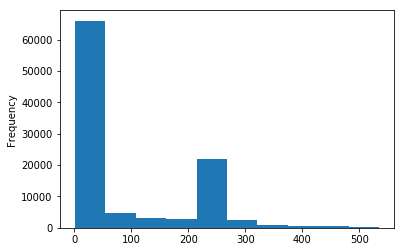

In [8]:
df['agent'].plot.hist()

In [9]:
df['agent'].describe()

count    103048.000000
mean         86.694841
std         110.775127
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [10]:
agent_mode = df['agent'].mode()[0]
(df[df['agent'] == agent_mode].shape[0]/row_number) *100

26.770308076323857

In [11]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(strategy='most_frequent')
df['agent'] = imp_num.fit_transform(df[['agent']])

In [12]:
df[df['agent'].isnull()].shape

(0, 31)

In [13]:
df.groupby('country').count().reset_index()[['country','hotel']].describe()

,hotel
count,177.000000
mean,671.740113
std,3930.877006
min,1.000000
25%,2.000000
50%,12.000000
75%,74.000000
max,48586.000000


In [14]:
df['country'] = imp_num.fit_transform(df[['country']])

In [15]:
df[df['country'].isnull()].shape

(0, 31)

# 2. Основные графики

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

## 2.1 Столбчатые диаграммы

### Библиотека seaborn

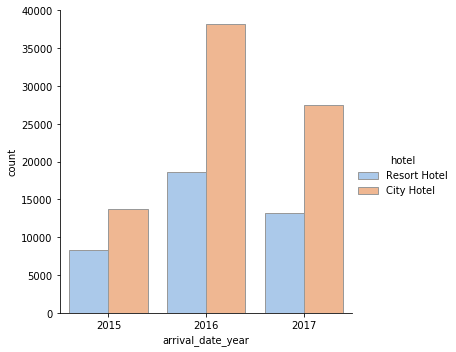

In [17]:
sns.catplot(x="arrival_date_year", hue="hotel", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

На основе данной диаграммы можно сделать вывод, о том, что посещаемость у отеля "City Hotel" выше чем у "Resort Hotel". Также на диаграмме видно, что наиболее высокая посещаемость у обоих отелей была в 2016 году.

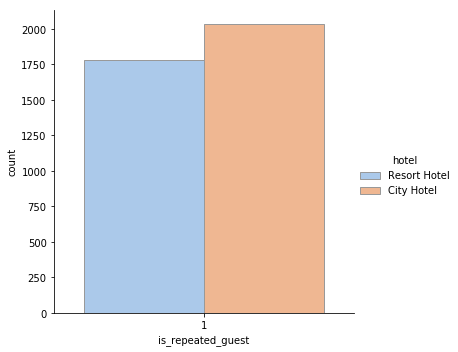

In [18]:
sns.catplot(x="is_repeated_guest", hue="hotel", kind="count",
            palette="pastel", edgecolor=".6",
            data=df[df['is_repeated_guest'] == 1]);

На основе данной диаграммы можно сделать вывод о том, что количество отмен выше у отеля "City Hotel".

### Библиотека matplotlib

<BarContainer object of 12 artists>

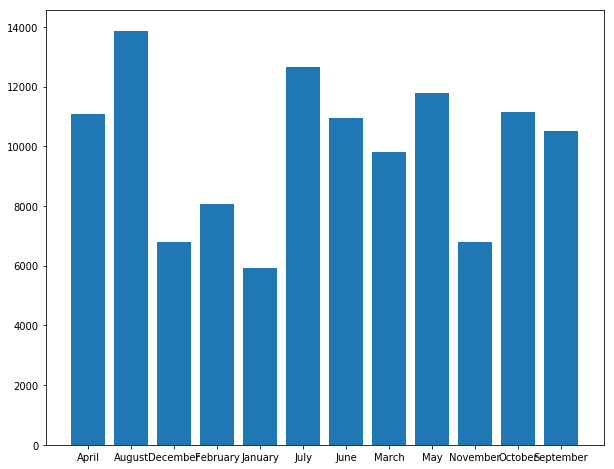

In [38]:
grouped_date_by_month = df.groupby('arrival_date_month').count().reset_index()[['arrival_date_month','hotel']]
plt.figure(figsize=(10, 8))
plt.bar(grouped_date_by_month['arrival_date_month'],grouped_date_by_month['hotel'])

На основе данной диаграммы можно сделать вывод о том, что наиболее низкая посещаемость отелей наблюдается в январе, а наиболее высокая - в августе.

## 2.2 Диаграммы рассеивания 

### Библиотека seaborn

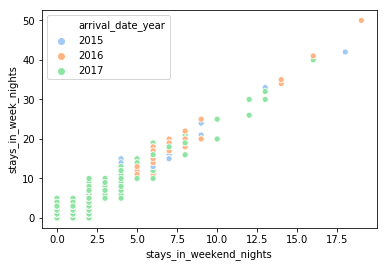

In [39]:
sns.scatterplot(x="stays_in_weekend_nights", y="stays_in_week_nights", hue='arrival_date_year', 
                palette="pastel",data=df)

## 2.3 Гистограммы 

### Библиотека seaborn 

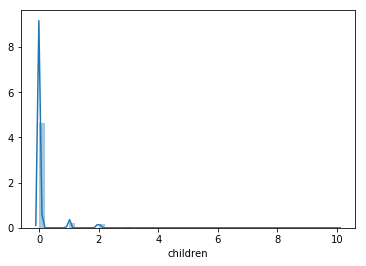

In [22]:
sns.distplot(df['children'])

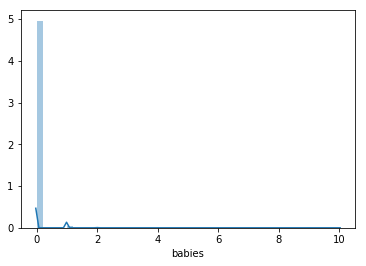

In [23]:
sns.distplot(df['babies'])

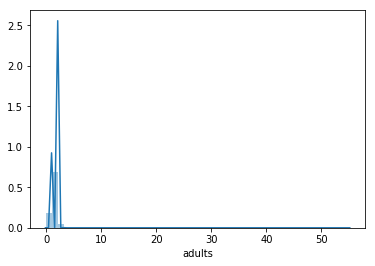

In [24]:
sns.distplot(df['adults'])

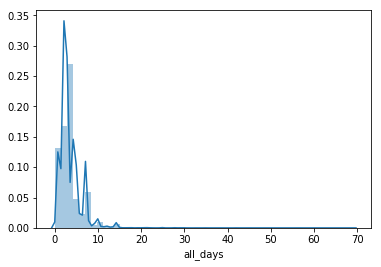

In [25]:
sns.distplot(df['all_days'])

## 2.4 Диаграммы ящик с усами

### Библиотека seaborn

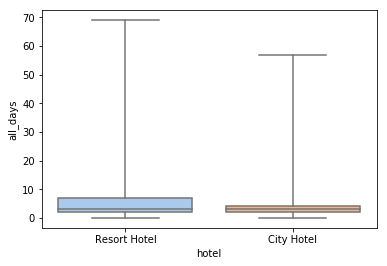

In [59]:
sns.boxplot(x="hotel", y="all_days", data=df,
            whis="range", palette="pastel")

На основе данной диаграммы можно сделать вывод, что максимально общее количество дней брони выше у отеля "Resort Hotel", чем у "City Hotel", кроме того у отеля "City Hotel" размах между 1ой и 3ей квартилью меньше, чем у отеля "Resort Hotel", что означает, что в отеле "City Hotel", наиболее часты котороткие брони.

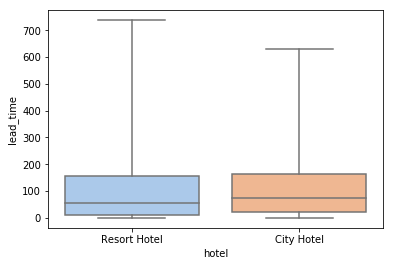

In [60]:
sns.boxplot(x="hotel", y="lead_time", data=df,
            whis="range", palette="pastel")

На основе данной диаграммы можно сделать вывод о том, что количество дней с момента бронирования, до приезда у обоих отелей имеет примерно одинаковый размах, но максимально количество времени - у отеля "Resort Hotel".

### 2.5 Violin plot 

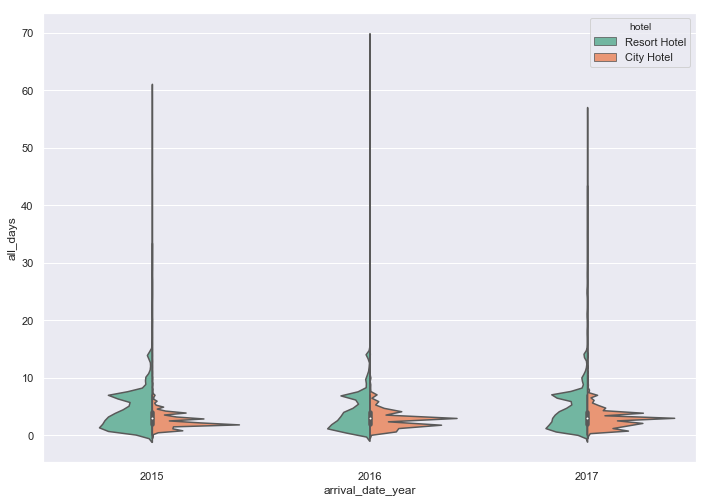

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="arrival_date_year", y="all_days", hue="hotel",
                     data=df, palette="Set2", split=True,
                     scale="count")

# 3. Корреляционный анализ

In [81]:
corr_m = df[['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']].corr()

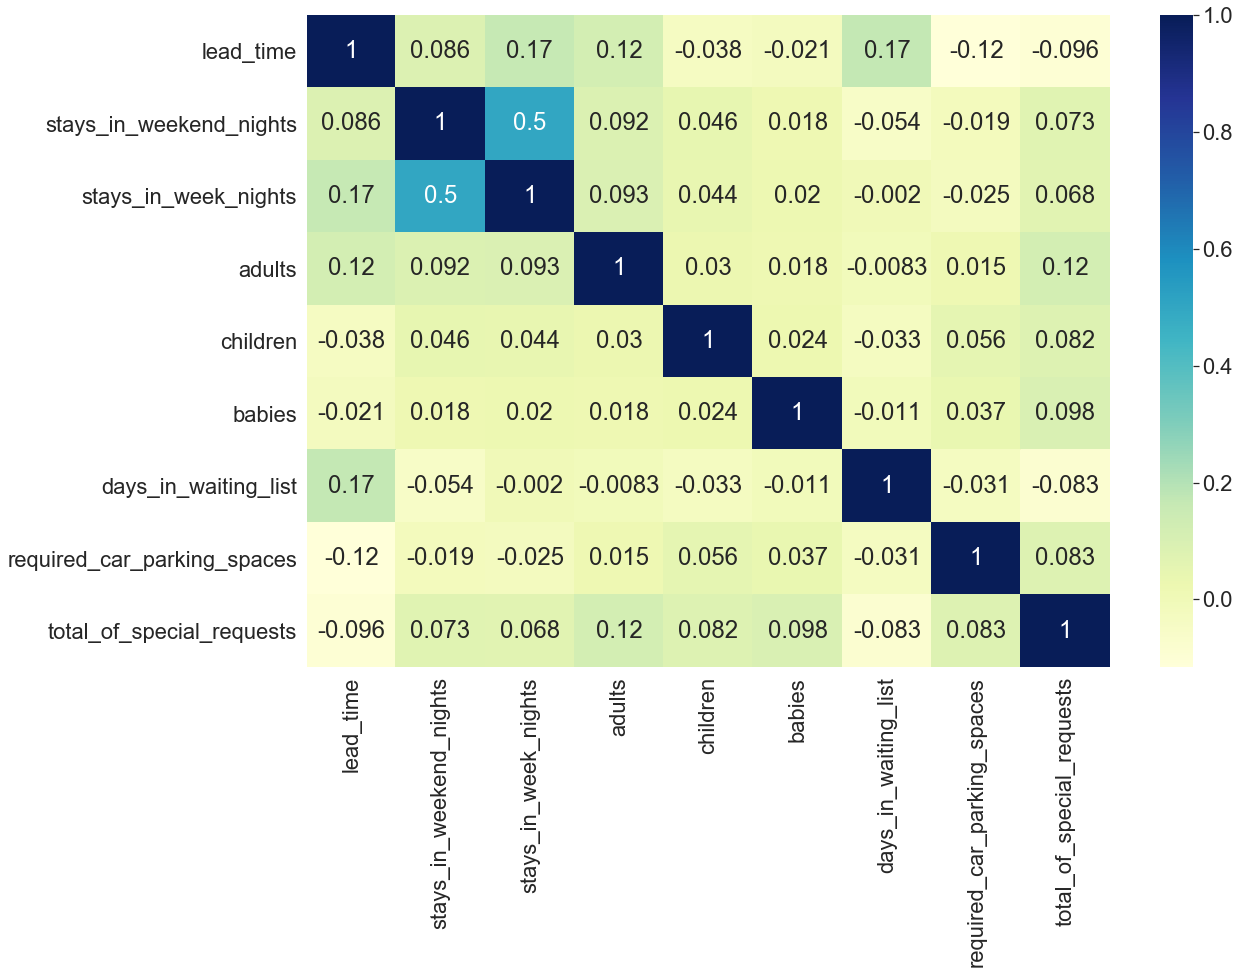

In [82]:
sns.set(font_scale=2)
plt.figure(figsize=(18, 12))
ax = sns.heatmap(corr_m, annot=True, cmap='YlGnBu')

На основе корреляционного анализа можно увидеть, что данные между собой не коррелируют. Однако, слабая корреляция присутствует у полей stays_in_weekend_nights и stays_in_week_nights.